In [1]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv('datasets/housing_prices/train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.info()
### 1460 rows, 81 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing['Alley'].value_counts()
## change nulls for 'NA' and treat it as a new type of val

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [9]:
missing_val_count_by_column = (housing.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


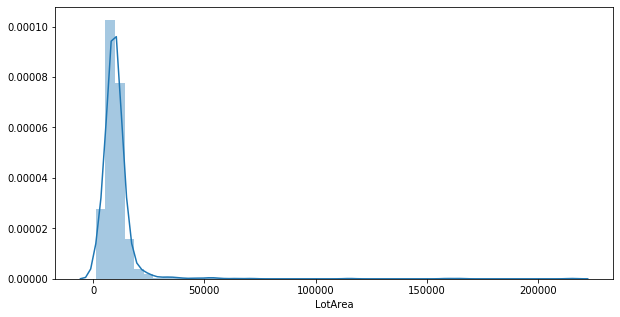

In [10]:
plt.figure(figsize=(10, 5))
sns.distplot(housing['LotArea'])
plt.show()

In [14]:
cat_columns = housing.select_dtypes(include='object').columns
num_columns = housing.select_dtypes(exclude='object').columns

In [15]:
cat_columns.shape

(43,)

In [16]:
num_columns.shape

(38,)

### Problems to solve:
1. Categorical encodings: what's the best strategy?
2. Missing value imputation: just the mean?

## Missing values

In [17]:
##################
## in cat cols
##################
missing_val_count_by_column = (housing[cat_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [19]:
##################
## in num cols
##################
missing_val_count_by_column = (housing[num_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [21]:
housing[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


#### Imputing MasVnrArea

In [23]:
housing['MasVnrArea'].head(10)
### most vals are zero

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
5      0.0
6    186.0
7    240.0
8      0.0
9      0.0
Name: MasVnrArea, dtype: float64

In [27]:
indices = housing[housing['MasVnrArea'].isnull()].index

In [25]:
housing['MasVnrArea'].mode()

0    0.0
dtype: float64

In [29]:
for idx in indices:
    housing.at[idx, 'MasVnrArea'] = 0.0

#### Imputing LotFrontage

In [31]:
### 259 rows. Is it sensible to impute using mean or median?
### won't it affect training? wouldn't it be better to drop these rows instead?
from sklearn.impute import SimpleImputer

In [32]:
lotFrontageImputer = SimpleImputer(strategy='mean')
lotFrontageImputer.fit(housing['LotFrontage'].values.reshape(-1, 1))
housing['LotFrontage'] = lotFrontageImputer.transform(housing['LotFrontage'].values.reshape(-1, 1))

#### Imputing GarageYrBlt

In [33]:
garageYrBltImputer = SimpleImputer(strategy='mean')
garageYrBltImputer.fit(housing['GarageYrBlt'].values.reshape(-1, 1))
housing['GarageYrBlt'] = garageYrBltImputer.transform(housing['GarageYrBlt'].values.reshape(-1, 1))

In [34]:
### Do we still have missing vals in num cols?
missing_val_count_by_column = (housing[num_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


### Let's impute cat cols

In [35]:
missing_val_count_by_column = (housing[cat_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [36]:
### 1460 is the total num of rows in training set
### some cols have missing vals, we have 3 options:
### 1) drop rows (cannot be done on test set)
### 2) drop cols (if and only if there are a lot of missing vals)
### 3) impute vals (if and only if there are not too many missing vals)

### We need to test different effects of
### 1) Using imputed vals while training
### 2) Dropping cols while training

#### Imputing Alley

In [38]:
housing['Alley'] = housing['Alley'].fillna('NAA') # NAA: no alley access

#### Imputing MasVnrType

In [39]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [40]:
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

#### Imputing BsmtQual

In [42]:
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [43]:
housing['BsmtQual'] = housing['BsmtQual'].fillna('NB') # NB: no basement - this assumes that in test set var looks same

#### Imputing BsmtCond

In [44]:
housing['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [45]:
housing['BsmtCond'] = housing['BsmtCond'].fillna('NB') # NB: no basement

#### Imputing BsmtExposure

In [48]:
housing['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [49]:
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('NB') # NB: no basement

#### Imputing BsmtFinType1

In [50]:
housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [51]:
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('NB') # NB: no basement

#### Imputing BsmtFinType2

In [53]:
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [54]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('NB') # NB: no basement

#### Imputing Electrical

In [55]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [56]:
## imputing the mode (to only one MV, btw!)
housing['Electrical'] = housing['Electrical'].fillna('SBrkr')

#### Imputing FireplaceQu

In [57]:
housing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [58]:
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('NF') # NF: no fireplace!

#### Imputing GarageType

In [59]:
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [60]:
housing['GarageType'] = housing['GarageType'].fillna('NG') # NG: no garage

#### Imputing GarageFinish

In [62]:
housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [63]:
housing['GarageFinish'] = housing['GarageFinish'].fillna('NG') # NG: no garage

#### Imputing GarageQual

In [64]:
housing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [65]:
housing['GarageQual'] = housing['GarageQual'].fillna('NG') # NG: no garage

#### Imputing GarageCond

In [66]:
housing['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [67]:
housing['GarageCond'] = housing['GarageCond'].fillna('NG') # NG: no garage

#### Imputing PoolQC

In [68]:
housing['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [73]:
#### 1453 rows w/o pool. Does it mean that row has no pool?
housing[housing['PoolArea'] > 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.000000,25419,Pave,NAA,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.000000,10140,Pave,NAA,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.000000,9880,Pave,NAA,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.000000,15623,Pave,NAA,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.000000,63887,Pave,NAA,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.000000,16692,Pave,NAA,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,70.049958,19690,Pave,NAA,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [76]:
### Only 7 rows have PoolArea != 0, these are the same where there PoolQC is MV
housing[housing['PoolQC'].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.000000,25419,Pave,NAA,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.000000,10140,Pave,NAA,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.000000,9880,Pave,NAA,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.000000,15623,Pave,NAA,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.000000,63887,Pave,NAA,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.000000,16692,Pave,NAA,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,70.049958,19690,Pave,NAA,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [77]:
### impute with NP: no pool
housing['PoolQC'] = housing['PoolQC'].fillna('NP')

#### Imputing Fence

In [78]:
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [79]:
housing['Fence'] = housing['Fence'].fillna('NF') # NF: no fence

#### Imputing MiscFeature

In [80]:
housing['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [81]:
housing['MiscFeature'] = housing['MiscFeature'].fillna('None') # None: no other feature

In [82]:
### do we still have missing vals?
missing_val_count_by_column = (housing.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


### Now we can do some feature cleaning, engineering, viz, etc.

In [83]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NAA,Reg,Lvl,AllPub,...,0,NP,NF,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NAA,Reg,Lvl,AllPub,...,0,NP,NF,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NAA,IR1,Lvl,AllPub,...,0,NP,NF,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NAA,IR1,Lvl,AllPub,...,0,NP,NF,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NAA,IR1,Lvl,AllPub,...,0,NP,NF,None,0,12,2008,WD,Normal,250000


In [102]:
housing.to_csv('datasets/housing_prices/noMVs_train.csv', index=False)

In [84]:
#### TARGET VAR: SalePrice!

In [90]:
num_columns.shape

(38,)

#### Do num cols need scaling or any other type of conversion?

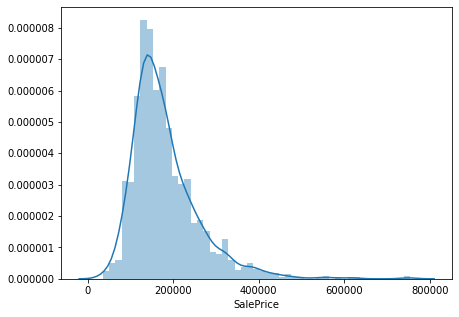

In [98]:
plt.figure(figsize=(7, 5))
sns.distplot(housing['SalePrice'])
plt.show()

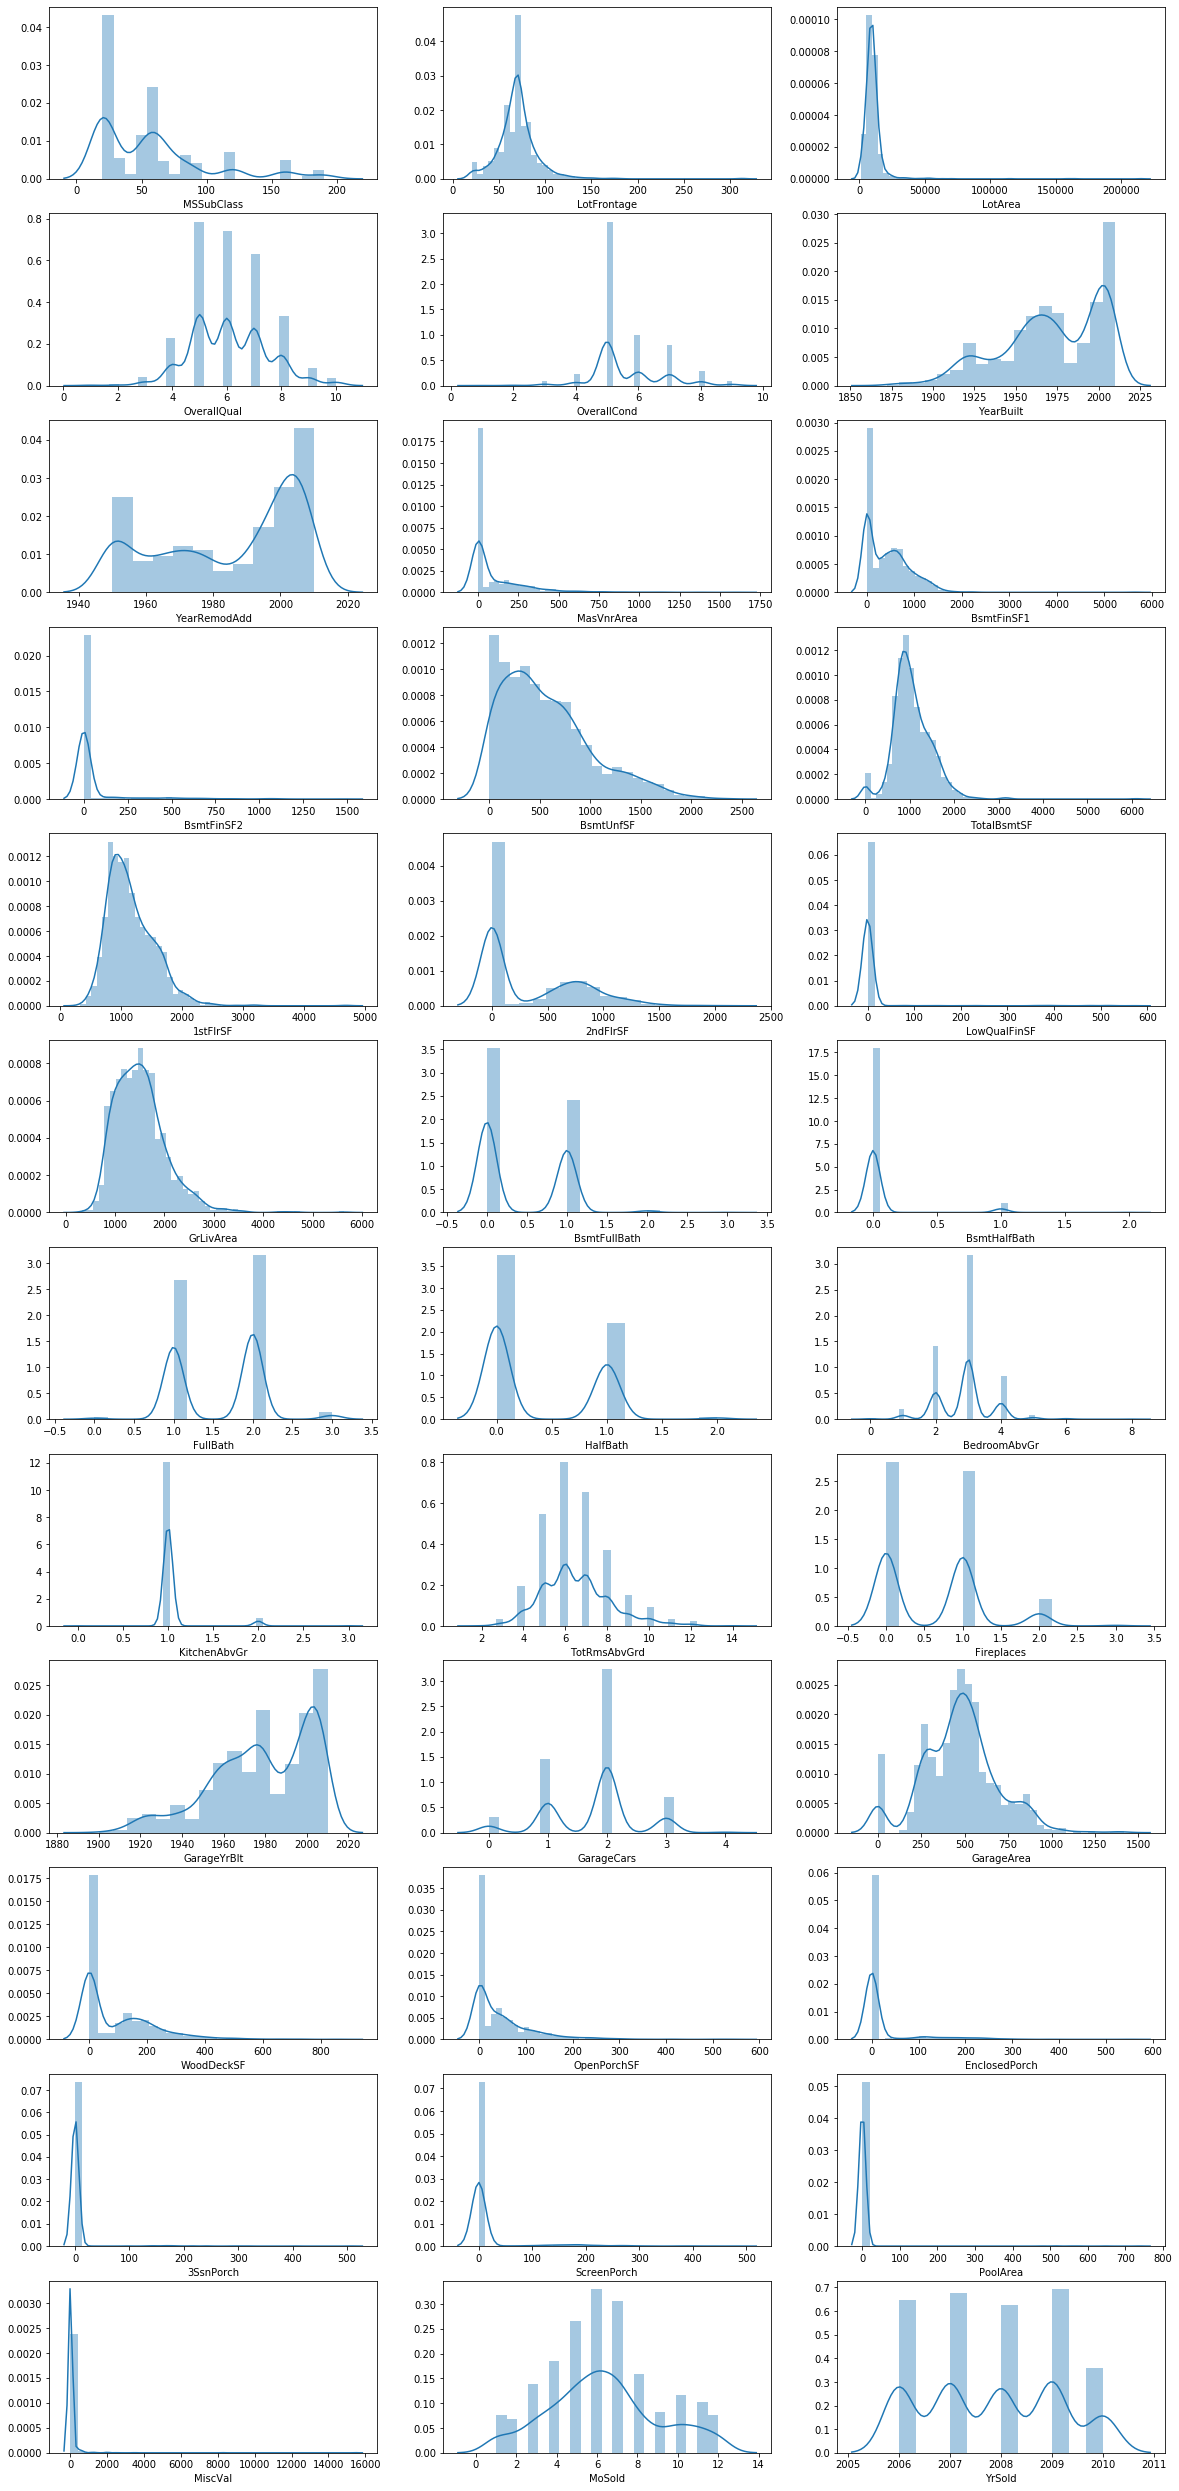

In [97]:
i = 1
plt.figure(figsize=(20, 45))
for col in num_columns:
    if col != 'Id' and col != 'SalePrice':
        plt.subplot(12, 3, i)
        sns.distplot(housing[col])
        i += 1
plt.show()

In [145]:
cols2scale = ['LotFrontage','LotArea',
              'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
              'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
              'EnclosedPorch','3SsnPorch','ScreenPorch'
             ]
cols2labelencode = ['MSSubClass']

In [100]:
housing[['PoolArea']].describe()

,PoolArea
count,1460.000000
mean,2.758904
std,40.177307
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,738.000000


In [101]:
housing[housing['PoolArea'] > 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.000000,25419,Pave,NAA,Reg,Lvl,AllPub,...,512,Ex,GdPrv,None,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.000000,10140,Pave,NAA,Reg,Lvl,AllPub,...,648,Fa,GdPrv,None,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.000000,9880,Pave,NAA,Reg,Lvl,AllPub,...,576,Gd,GdPrv,None,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.000000,15623,Pave,NAA,IR1,Lvl,AllPub,...,555,Ex,MnPrv,None,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.000000,63887,Pave,NAA,IR3,Bnk,AllPub,...,480,Gd,NF,None,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.000000,16692,Pave,NAA,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,70.049958,19690,Pave,NAA,IR1,Lvl,AllPub,...,738,Gd,GdPrv,None,0,8,2006,WD,Alloca,274970


In [103]:
### PoolArea has a peak at zero, which means that most houses dont have a pool
### This affects the distribution forming like an outlier.
### How should we scale it???
### Let's experiment w different scaling strategies

In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [113]:
housingScaler = MinMaxScaler()
housing['PoolArea_scaled'] = housingScaler.fit_transform(housing['PoolArea'].values.reshape(-1, 1))

In [116]:
### drop PoolArea and use instead PoolQC
unnecessary_cols = ['Id', 'PoolArea','MiscVal','ScreenPorch_scaled','PoolArea_scaled']

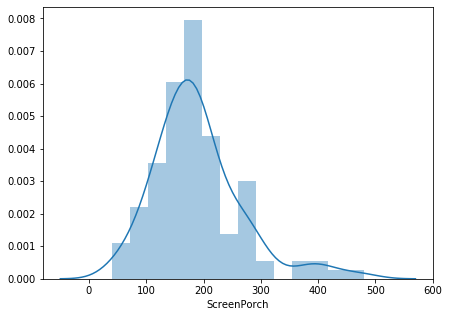

In [121]:
plt.figure(figsize=(7, 5))
sns.distplot(housing[housing['ScreenPorch'] > 0]['ScreenPorch'])
plt.show()
### The plot below doesn't consider obs where screenporch = 0

In [129]:
screenPorchScaler = MinMaxScaler()
housing['ScreenPorch_scaled'] = screenPorchScaler.fit_transform(housing['ScreenPorch'].values.reshape(-1, 1))

#### Let's have a look at cat cols now

In [138]:
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [139]:
### one problem that we might encounter is that when we use get_dummies on training set
### we might come across values in cols in the test set that were not seen in the training
### set and thus get_dummies will yield a diff transformation

### one way to prevent this would be to use something like the countencoder

#### Let's encode cat cols using CountEncoder

In [140]:
from category_encoders import CountEncoder

In [142]:
countEncoder = CountEncoder()
housing[cat_columns] = countEncoder.fit_transform(housing[cat_columns])

In [143]:
housing[cat_columns]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1151,1454,1369,925,1311,1459,1052,1382,150,1260,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
1,1151,1454,1369,925,1311,1459,47,1382,11,81,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
2,1151,1454,1369,484,1311,1459,1052,1382,150,1260,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
3,1151,1454,1369,484,1311,1459,263,1382,51,1260,...,387,605,1311,1326,1340,1453,1179,1406,1267,101
4,1151,1454,1369,484,1311,1459,47,1382,41,1260,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1151,1454,1369,925,1311,1459,1052,1382,79,1260,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
1456,1151,1454,1369,925,1311,1459,1052,1382,73,1260,...,870,605,1311,1326,1340,1453,157,1406,1267,1198
1457,1151,1454,1369,925,1311,1459,1052,1382,51,1260,...,870,422,1311,1326,1340,1453,59,49,1267,1198
1458,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


#### Let's scale whatever needs scaling

In [148]:
total2scale = [*cat_columns, *cols2scale]

In [151]:
numScaler = MinMaxScaler()
housing[total2scale] = numScaler.fit_transform(housing[total2scale])

In [152]:
housing[total2scale].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,0.663677,1.000000,...,0.119780,0.413559,0.0,0.259231,0.386460,0.000000,0.111517,0.000000,0.0,0.0
1,1.0,1.0,1.0,1.000000,1.0,1.0,0.041031,1.0,0.040359,0.062798,...,0.212942,0.000000,0.0,0.174830,0.324401,0.347725,0.000000,0.000000,0.0,0.0
2,1.0,1.0,1.0,0.518033,1.0,1.0,1.000000,1.0,0.663677,1.000000,...,0.134465,0.419370,0.0,0.273549,0.428773,0.000000,0.076782,0.000000,0.0,0.0
3,1.0,1.0,1.0,0.518033,1.0,1.0,0.247137,1.0,0.219731,1.000000,...,0.143873,0.366102,0.0,0.260550,0.452750,0.000000,0.063985,0.492754,0.0,0.0
4,1.0,1.0,1.0,0.518033,1.0,1.0,0.041031,1.0,0.174888,1.000000,...,0.186095,0.509927,0.0,0.351168,0.589563,0.224037,0.153565,0.000000,0.0,0.0


#### Let's labelencode whatever needs labelencoding

In [154]:
from sklearn.preprocessing import LabelEncoder

In [158]:
labelEncoder = LabelEncoder()
housing['MSSubClass'] = labelEncoder.fit_transform(housing['MSSubClass'].values.reshape(-1, 1))

In [160]:
housing.to_csv('datasets/housing_prices/noMVs_preprocessed_train.csv', index=False)

In [166]:
housing.drop(['MiscVal','ScreenPorch_scaled','PoolArea_scaled'], axis=1, inplace=True)

In [167]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,1.0,0.150685,0.033420,1.0,1.0,1.000000,1.0,1.0,1.000000,...,0.0,0.0,1.0,1.0,1.0,2,2008,1.0,1.00000,208500
1,0,1.0,0.202055,0.038795,1.0,1.0,1.000000,1.0,1.0,0.041031,...,0.0,0.0,1.0,1.0,1.0,5,2007,1.0,1.00000,181500
2,5,1.0,0.160959,0.046507,1.0,1.0,0.518033,1.0,1.0,1.000000,...,0.0,0.0,1.0,1.0,1.0,9,2008,1.0,1.00000,223500
3,6,1.0,0.133562,0.038561,1.0,1.0,0.518033,1.0,1.0,0.247137,...,0.0,0.0,1.0,1.0,1.0,2,2006,1.0,0.08124,140000
4,5,1.0,0.215753,0.060576,1.0,1.0,0.518033,1.0,1.0,0.041031,...,0.0,0.0,1.0,1.0,1.0,12,2008,1.0,1.00000,250000


#### So far we have fill MVs, scaled num cols and encoded cat cols. Are we ready to train? What about dim redux?

### Let's give training a try!

In [169]:
X = housing.drop(['SalePrice'], axis=1, inplace=False)
y = housing['SalePrice']

In [170]:
from sklearn.model_selection import train_test_split

In [175]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score

In [172]:
from sklearn.linear_model import LinearRegression

In [176]:
kFold = KFold(n_splits=10, random_state=0, shuffle=True)
maes = []
r2s = []

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]
    
    modelLR = LinearRegression() # just a LR out of the box
    modelLR.fit(X_trainCV, y_trainCV)
    preds = modelLR.predict(X_testCV)
    mae = mean_absolute_error(preds, y_testCV)
    r2 = r2_score(preds, y_testCV)
    
    print("MAE:", mae, "r2:", r2)
    maes.append(mae)
    r2s.append(r2)
    print()
print("Mean MAE:", np.mean(maes))
print("Mean r2:", np.mean(r2s))

Fold: 0
MAE: 23042.73999620053 r2: 0.6703568498654322

Fold: 1
MAE: 24707.429563847818 r2: 0.5347928816526606

Fold: 2
MAE: 20069.432224053715 r2: 0.8438561948953859

Fold: 3
MAE: 18225.999722568584 r2: 0.8631873343283466

Fold: 4
MAE: 23778.654791208533 r2: 0.6589439147636588

Fold: 5
MAE: 18116.931320370655 r2: 0.9093218637794225

Fold: 6
MAE: 19751.55855516074 r2: 0.8500620415198922

Fold: 7
MAE: 18118.46546452443 r2: 0.7981840534197359

Fold: 8
MAE: 19401.738768869127 r2: 0.8193743220780465

Fold: 9
MAE: 16997.269274928207 r2: 0.8664553291400514

Mean MAE: 20221.021968173234
Mean r2: 0.7814534785442633


In [178]:
modelLR.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

#### RandomForest Regressor

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
### Dataset is small, why should we split in train and test set rather than using CV to train and evaluate?

In [181]:
maes = []
r2s = []

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]
    
    modelRF = RandomForestRegressor(random_state=0, criterion='mae') # just a LR out of the box
    modelRF.fit(X_trainCV, y_trainCV)
    preds = modelRF.predict(X_testCV)
    mae = mean_absolute_error(preds, y_testCV)
    r2 = r2_score(preds, y_testCV)
    
    print("MAE:", mae, "r2:", r2)
    maes.append(mae)
    r2s.append(r2)
    print()
print("Mean MAE:", np.mean(maes))
print("Mean r2:", np.mean(r2s))

Fold: 0
MAE: 16371.765993150684 r2: 0.7976757719185658

Fold: 1
MAE: 20091.447602739725 r2: 0.7840584395101045

Fold: 2
MAE: 17351.431541095888 r2: 0.8635744373973149

Fold: 3
MAE: 16754.005547945206 r2: 0.8486115232832346

Fold: 4
MAE: 20722.447191780822 r2: 0.7212363428544939

Fold: 5
MAE: 16979.86287671233 r2: 0.8881251537359083

Fold: 6
MAE: 17296.862123287672 r2: 0.8571236718193278

Fold: 7
MAE: 17843.835616438355 r2: 0.8441388440816854

Fold: 8
MAE: 17018.688390410956 r2: 0.8215467544151932

Fold: 9
MAE: 16332.832568493148 r2: 0.8471655829354156

Mean MAE: 17676.31794520548
Mean r2: 0.8273256521951244


In [184]:
modelRF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [183]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'criterion': 'mae',
    'n_estimators': [],
    'max_depth': [],
    'min_samples_split': []
}